In [9]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import MySQLdb
import csv

## Read CSV file

In [10]:
# extract and store data into df into tabular format
df=pd.read_csv('data.csv')

In [11]:
# print data
df

,Date,High Price,Low Price,Close Price,Total Traded Quantity,Turnover (in lacs),No. of Contracts
0,01-Jan-2021,1443.00,1420.60,1425.05,4405469,63155.33422,24302
1,04-Jan-2021,1438.00,1399.00,1416.00,7870096,111534.73280,40233
2,05-Jan-2021,1430.75,1409.00,1426.70,7193412,102141.60600,49022
3,06-Jan-2021,1440.00,1413.10,1420.55,11067025,157545.11010,62408
4,07-Jan-2021,1432.60,1412.55,1416.25,9947421,141486.23310,47083
...,...,...,...,...,...,...,...
176,20-Sep-2021,1581.70,1558.00,1559.85,4390805,68894.37483,99026
177,21-Sep-2021,1568.65,1528.95,1551.95,7387498,114102.02960,106161
178,22-Sep-2021,1550.15,1530.00,1533.70,5291101,81323.32796,86021
179,23-Sep-2021,1572.00,1542.00,1570.00,6832152,106667.87040,136784


## Rename the columns

In [12]:
# define the dictionary 'conversion' which is used to rename the columns of the table
conversion={'Date':'date','High Price':'high','Low Price':'low',
            'Total Traded Quantity':'trade','Turnover (in lacs)':' turnover_in_lakhs'
            ,'No. of Contracts':'contracts'}

# iterate the columns
list=[]
for column in df.columns:
  # if key present in dictionary then store its value in list otherwise store its original name
  if column in conversion:
    list.append(conversion[column])
  else:
    list.append(column)

# assign new names of column
df.columns=list

In [13]:
# analyze the table
df

,date,high,low,Close Price,trade,turnover_in_lakhs,contracts
0,01-Jan-2021,1443.00,1420.60,1425.05,4405469,63155.33422,24302
1,04-Jan-2021,1438.00,1399.00,1416.00,7870096,111534.73280,40233
2,05-Jan-2021,1430.75,1409.00,1426.70,7193412,102141.60600,49022
3,06-Jan-2021,1440.00,1413.10,1420.55,11067025,157545.11010,62408
4,07-Jan-2021,1432.60,1412.55,1416.25,9947421,141486.23310,47083
...,...,...,...,...,...,...,...
176,20-Sep-2021,1581.70,1558.00,1559.85,4390805,68894.37483,99026
177,21-Sep-2021,1568.65,1528.95,1551.95,7387498,114102.02960,106161
178,22-Sep-2021,1550.15,1530.00,1533.70,5291101,81323.32796,86021
179,23-Sep-2021,1572.00,1542.00,1570.00,6832152,106667.87040,136784


## Add 'difference' column

In [14]:
# initialize the empty list which is used to store the difference
list=[]

# store the values by iterating the row
for i in range(len(df)):
  list.append(df['high'][i]-df['low'][i])

# adding up the column 'difference' in the dataframe
df['difference']=list

In [15]:
# analyze the data
df

,date,high,low,Close Price,trade,turnover_in_lakhs,contracts,difference
0,01-Jan-2021,1443.00,1420.60,1425.05,4405469,63155.33422,24302,22.40
1,04-Jan-2021,1438.00,1399.00,1416.00,7870096,111534.73280,40233,39.00
2,05-Jan-2021,1430.75,1409.00,1426.70,7193412,102141.60600,49022,21.75
3,06-Jan-2021,1440.00,1413.10,1420.55,11067025,157545.11010,62408,26.90
4,07-Jan-2021,1432.60,1412.55,1416.25,9947421,141486.23310,47083,20.05
...,...,...,...,...,...,...,...,...
176,20-Sep-2021,1581.70,1558.00,1559.85,4390805,68894.37483,99026,23.70
177,21-Sep-2021,1568.65,1528.95,1551.95,7387498,114102.02960,106161,39.70
178,22-Sep-2021,1550.15,1530.00,1533.70,5291101,81323.32796,86021,20.15
179,23-Sep-2021,1572.00,1542.00,1570.00,6832152,106667.87040,136784,30.00


## Save the processed_data.csv

In [16]:
# saving up the data into csv format
df.to_csv('processed_data.csv',index=False)

## Make correlation matrix
- This matrix is simply represents correlation between the columns with each other. In the correlation matrix given below as you can see how 'high' and 'Cost Price' are highly dependent on each other which means on increasing the value of 'high' 'Cost Price' will also be increases. While on the other hand if we see correlation between 'high' and 'contracts' so it is lessly correlated with each other which means Number of contracts are not dependent on high price.

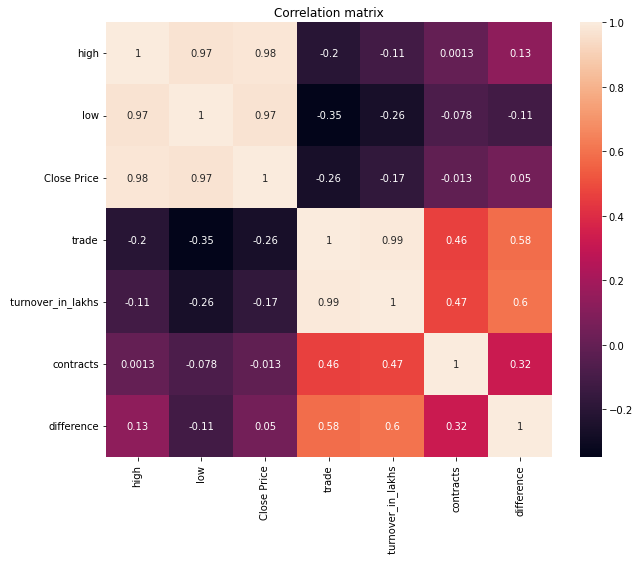

In [17]:
# creating a correlation matrix
plt.figure(figsize=(10,8))
plt.title('Correlation matrix')
data_plot= seaborn.heatmap(df.corr(),annot=True)
plt.show()

## Upload processed_data.csv into MySql database

In [ ]:
# connecting with database
mydb=MySQLdb.connect(host="127.0.0.1",user="root",password="111PythonFinTest###",database="python_fin_test")
cursor=mydb.cursor()

In [ ]:
# empty list to store all the values
all_values=[]
# open the csv file
with open('processed_data.csv') as file:
    # read the file
    csvfile=csv.reader(file,delimiter=',')
    # enumerate is used to get elements as well as iteration number
    for i,row in enumerate(csvfile):
        if i!=0:
            list=[]
            for data in row:
              list.append(data)
            # append the values in tupple format
            all_values.append(tuple(list))

In [ ]:
# push all the values into database
queries='insert into processed_data values(%s,%s,%s,%s,%s,%s,%s,%s)'
for row in all_values:
    cursor.execute(queries,row)
# commit the data
mydb.commit()
#close the cursor
cursor.close()